<a href="https://colab.research.google.com/github/bernaldiaz/pymae_python_mechanical/blob/master/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Graph thrust required and thrust available at sea level, 10,000 ft, and 35,000 ft (fl350)

Produced for "Python for Mechanical and Aerospace Engineering" by Alex Kenan, ISBN 978-1-7360606-0-5 and 978-1-7360606-1-2.
Copyright © 2020 Alexander Kenan. Some Rights Reserved. This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. 
See http://creativecommons.org/licenses/by-nc-sa/4.0/ for more information.
"""

'\nGraph thrust required and thrust available at sea level, 10,000 ft, and 35,000 ft (fl350)\n\nProduced for "Python for Mechanical and Aerospace Engineering" by Alex Kenan, ISBN 978-1-7360606-0-5 and 978-1-7360606-1-2.\nCopyright © 2020 Alexander Kenan. Some Rights Reserved. This work is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. \nSee http://creativecommons.org/licenses/by-nc-sa/4.0/ for more information.\n'

In [2]:
from numpy import pi
import matplotlib.pyplot as plt


In [3]:
# Functions
def knots_to_ftpersec(speed):
    return speed * 1.68781


def thrust_required(rho_inf, v_inf, s, cd0_, k, w):
    cl = 2 * w / (rho_inf * v_inf ** 2 * s)
    return 0.5 * rho_inf * v_inf ** 2 * s * (cd0_ + k * cl ** 2)

In [5]:
# Inputs

weight = 200000  # lb
wing_area = 1318  # ft^2
wing_span = 117.416666667  # ft
cd0 = 0.0185
thrust = 66000  # lb of thrust total
aspect_ratio = wing_span**2 / wing_area
e = 0.92
K = 1 / (pi * e * aspect_ratio)
rho_sl = 23.77E-4  # in slugs/ft^3

x_vals_sl = [i for i in range(80, 750, 10)]

tr_sl = [thrust_required(rho_sl, knots_to_ftpersec(x), wing_area, cd0, K, weight) for x in x_vals_sl]


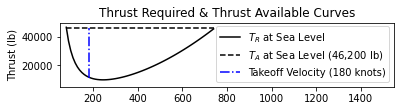

In [6]:
# Sea Level

plt.subplot(3, 1, 1)
plt.plot(x_vals_sl, tr_sl, 'k-', label=r"$T_R$ at Sea Level")
TA_sl = 0.7 * thrust
y_coords_sl = [TA_sl for _ in x_vals_sl]
takeoff_vel_sl = [180, 180]
cruise_velocity_sl_values = [11000, 46500]

plt.plot(x_vals_sl, y_coords_sl, 'k--',
          label='$T_A$ at Sea Level ({:,.0f} lb)'.format(TA_sl))

plt.plot(takeoff_vel_sl, cruise_velocity_sl_values, 'b-.',
         label="Takeoff Velocity ({} knots)".format(takeoff_vel_sl[0]))
plt.ylim(5000, 50000)
plt.xlim(50, 1550)
plt.ylabel('Thrust (lb)')
#plt.xlabel('Velocity (kts)')
plt.title('Thrust Required & Thrust Available Curves')
plt.legend(loc='lower right')


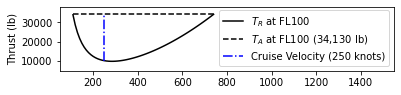

In [7]:
# FL100
plt.subplot(3, 1, 2)
rho_fl100 = 17.56E-4  # in slugs/ft^3
x_vals_fl100 = [i for i in range(110, 745, 10)]
tr_fl100 = [thrust_required(rho_fl100, knots_to_ftpersec(x), wing_area, cd0, K, weight) for x in x_vals_fl100]
TA_fl100 = 0.7 * thrust * rho_fl100 / rho_sl
cruise_velocity = [250, 250]
cruise_velocity_fl100_values = [10000, 34130]
y_coords_fl100 = [TA_fl100 for _ in x_vals_fl100]


plt.plot(x_vals_fl100, tr_fl100, 'k-', label=r"$T_R$ at FL100")

plt.plot(x_vals_fl100, y_coords_fl100, 'k--',
          label="$T_A$ at FL100 ({:,.0f} lb)".format(TA_fl100))

plt.plot(cruise_velocity, cruise_velocity_fl100_values, 'b-.',
         label="Cruise Velocity ({} knots)".format(cruise_velocity[0]))

plt.ylabel('Thrust (lb)')
plt.ylim(5000, 38000)
plt.xlim(50, 1550)
plt.legend(loc='lower right')

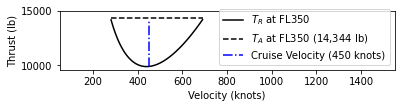

In [8]:
# FL350
plt.subplot(3, 1, 3)
rho_fl350 = 7.38E-4  # in slugs/ft^3
cruise_velocity_fl350 = [450, 450]
cruise_velocity_fl350_values = [9900, 14200]

x_vals_fl350 = [i for i in range(280, 695, 10)]
tr_fl350 = [thrust_required(rho_fl350, (knots_to_ftpersec(x)), wing_area, cd0, K, weight) for x in x_vals_fl350]

TA_fl350 = 0.7 * thrust * rho_fl350 / rho_sl
y_coords_fl350 = [TA_fl350 for _ in x_vals_fl350]

plt.plot(x_vals_fl350, tr_fl350, 'k-', label=r"$T_R$ at FL350")
plt.plot(x_vals_fl350, y_coords_fl350, 'k--',
          label=r"$T_A$ at FL350 ({:,.0f} lb)".format(TA_fl350))

plt.plot(cruise_velocity_fl350, cruise_velocity_fl350_values, 'b-.',
         label="Cruise Velocity ({} knots)".format(cruise_velocity_fl350[0]))

plt.xlabel('Velocity (knots)')
plt.ylabel('Thrust (lb)')
plt.xlim(50, 1550)
plt.ylim(9600, 15000)
plt.legend(loc='lower right')
plt.subplots_adjust(hspace=0.35)
plt.show()